Pipeline Collapse thickness calculation (APIRP1111).

The collapse pressure of the pipe shall exceed the net external pressure everywhere along the pipeline


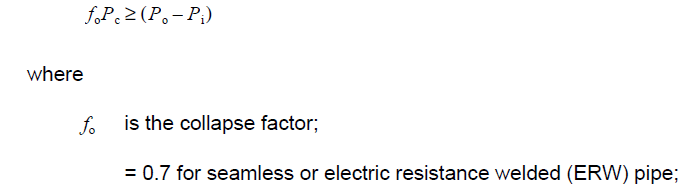

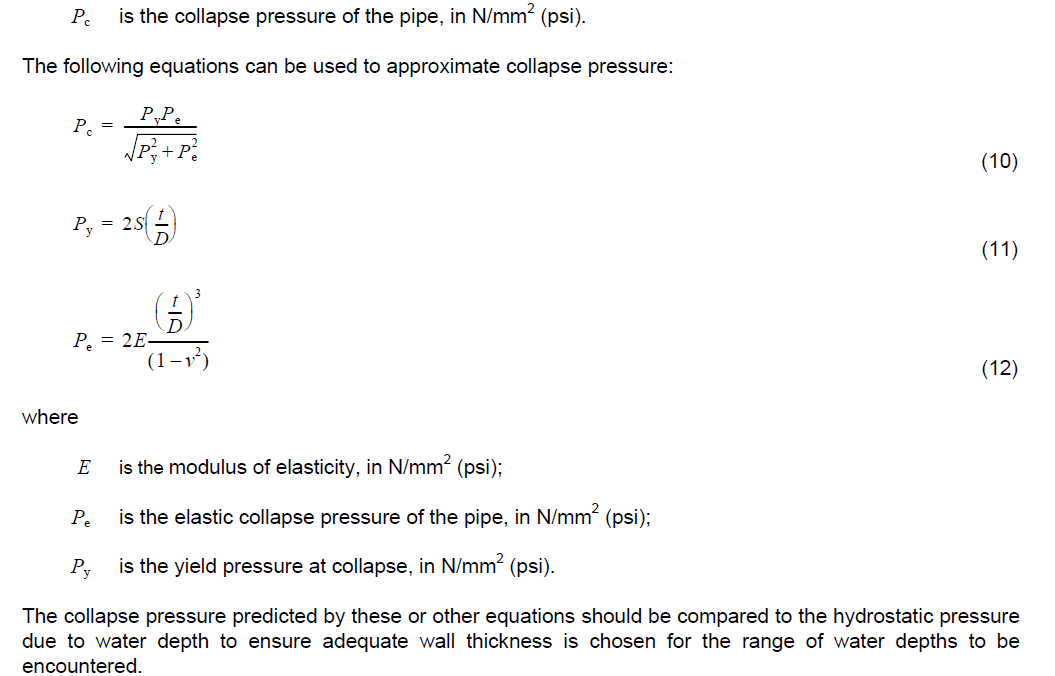

max collapse thickness= 16.09 mm
min collapse thickness= 15.73 mm
   Water depth[m] Thickness[mm] D/tc ratio
0         1600.00         15.73     20.093
1         1611.11         15.77     20.042
2         1622.22         15.81     19.991
3         1633.33         15.85     19.940
4         1644.44         15.89     19.890
5         1655.56         15.93     19.840
6         1666.67         15.97     19.790
7         1677.78         16.01     19.740
8         1688.89         16.05     19.691
9         1700.00         16.09     19.642


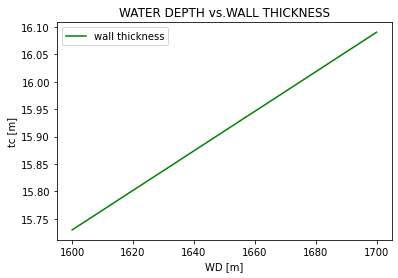

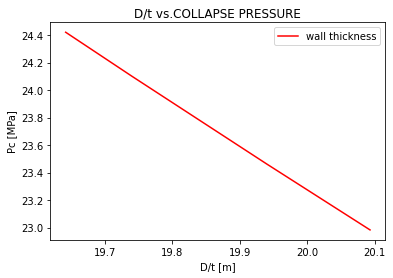

In [7]:
from pipedata import*  # imports all input data from the module pipedata.py
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Range of water depth  
WD = np.linspace(WD_min,WD_max,10)

# Derated yield stress as a function of design temperature
def fy(Td):
    if Td < 121:
        fy = 1
    elif 121 < Td <= 149:
        fy = (Td -121)*(-0.033/28) + 1
    elif 149 < Td <= 177:
        fy = (Td -121)*(-0.033/28) + 0.967
    elif 177 < Td <= 204:
        fy = (Td -177)*(-0.033/27) + 0.933
    else:
        fy = (Td -204)*(-0.033/28) + 0.9
    return fy*SMYS

# Collapse thickness calculation
def coll(WD):
    tc = sp.symbols('tc',real=True) 
    Pe = (rho_sw*g*WD)                         # external pressure calculation
    Pc = (Pe - Pmin)/f0                        # collapse pressure calculation
    Pel = 2*Es*(tc/D)**3/(1-v**2)              # elastic collapse pressure calculation
    Py = 2*fy(Td)*(tc/D)                       # yield collapse pressure calculation
    
    col = ((Pel*Py)/sp.sqrt(Pel**2+Py**2)) - Pc
    sol = sp.solve(col,check=False)[2]            # solution for thickness 
    return sol   

# get the thickness for the range of water depths,add CA(corrosion allowance) for shutdown case 
tc = list(round((coll(WD)+CA)*1000,2) for WD in np.linspace(WD_min,WD_max,10))

D_t = list(round(D/(coll(WD)+CA),3) for WD in np.linspace(WD_min,WD_max,10)) # D/t ratio
print('max collapse thickness=',round(max(tc),2),'mm')
print('min collapse thickness=',round(min(tc),3),'mm')

#Write result to file
def write_to_file():
    pd.set_option('display.max_rows', 200) # increase no.of rows to a maximum of 200 
    data = pd.DataFrame({'Water depth[m]':np.round(WD,decimals=2),'Thickness[mm]':tc,'D/tc ratio':D_t})
    print(data)
    file = open('Collapse_result.txt','w')
    file.write(str(data))
    return file.close()
write_to_file()

# Plots
def plots():
    #plot wall thickness vs. WD
    plt.plot(WD,tc,label='wall thickness',color='g')
    plt.title('WATER DEPTH vs.WALL THICKNESS')
    plt.xlabel('WD [m]')
    plt.ylabel('tc [m]')
    plt.savefig('fig A.water depth vs.Collapse thickness.png',dpi=100)
    plt.legend()
    plt.show()
    
    #plot D/t ratio vs collapse pressure vs. D/tc
    plt.plot(D_t,((rho_sw*g*WD) - Pmin)*10**-6/f0,label='wall thickness',color='r')
    plt.title('D/t vs.COLLAPSE PRESSURE' )
    plt.xlabel('D/t [m]')
    plt.ylabel('Pc [MPa]')
    plt.savefig('fig B.png',dpi=100)
    plt.legend()
    plt.show()
plots()